In [1]:
import numpy as np
import h5py
import treecorr
import pandas as pd
import pylab as mplot
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
## DES Y1 public download
from astropy.table import Table
data = Table.read('psf_y1a1-v13-jj.fits', format='fits')

In [3]:
data

ra,dec,x,y,e1,e2,size,psf_e1,psf_e2,psf_size,exp,ccd,fov_x,fov_y,filter,tiling
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,int16
-35.0833740234375,-51.4946174621582,1385.0888671875,289.1025695800781,-0.026112141087651253,-0.01467164047062397,0.4950573742389679,-0.01641884073615074,0.007252953015267849,0.4982171952724457,228725.0,1.0,-3166.0232306050625,-1582.7946948801678,g,4
-35.07847595214844,-51.47761917114258,1151.427734375,327.7016296386719,-0.026058707386255264,0.01991906575858593,0.508821964263916,-0.01618172787129879,0.008198064751923084,0.4987098276615143,228725.0,1.0,-3227.476111210124,-1572.6431374028525,g,4
-35.062530517578125,-51.522212982177734,1761.6644287109375,471.9386901855469,-0.01253590453416109,0.004537064582109451,0.5017954707145691,-0.01815333031117916,0.004876724909991026,0.500004231929779,228725.0,1.0,-3066.9838820027676,-1534.7087954953513,g,4
-34.96010208129883,-51.518062591552734,1695.4520263671875,1343.9967041015625,-0.018433665856719017,0.0073102801106870174,0.49760177731513977,-0.020236916840076447,0.005128225777298212,0.5036634206771851,228725.0,1.0,-3084.3977264292403,-1305.3575388387046,g,4
-34.95635223388672,-51.404014587402344,130.62265014648438,1357.517578125,-0.04054722934961319,-0.019233662635087967,0.5076663494110107,-0.01984431967139244,0.007709133438766003,0.5130198001861572,228725.0,1.0,-3495.9478432622914,-1301.8015650227865,g,4
-34.950782775878906,-51.417930603027344,320.92840576171875,1407.2703857421875,-0.019807474687695503,0.008375069126486778,0.5031841993331909,-0.01899109035730362,0.008055000565946102,0.5109618306159973,228725.0,1.0,-3445.897435304261,-1288.716543177287,g,4
-34.94122314453125,-51.527347564697266,1821.33935546875,1506.3699951171875,-0.04304871708154678,0.024985209107398987,0.5079672336578369,-0.021632498130202293,0.004381798207759857,0.5040193796157837,228725.0,1.0,-3051.2893669016526,-1262.6533806915284,g,4
-34.93510055541992,-51.45646286010742,848.0923461914062,1547.2144775390625,-0.0174381323158741,0.0073209600523114204,0.5098611116409302,-0.01816648617386818,0.008096745237708092,0.506793200969696,228725.0,1.0,-3307.2533162958784,-1251.9112844899496,g,4
-34.92000961303711,-51.483848571777344,1222.60791015625,1680.218017578125,-0.029829636216163635,0.02738025411963463,0.49603331089019775,-0.01906139776110649,0.007289195898920298,0.5050904750823975,228725.0,1.0,-3208.7557477203372,-1216.931366836548,g,4


In [5]:
## data yuuki cross-matched using ra/dec with Y3
## successfully matched 76% of sources to within <0.25"

data_matched= np.load('/global/cfs/cdirs/lsst/groups/WL/users/yomori/scratch/psf_y1a1-v13_matchedY3mags.npz')

In [6]:
idx = np.where(data_matched['match_mag']<20)[0]

In [9]:
np.size(idx)

6450157

In [10]:
#rho 1 
corr = treecorr.GGCorrelation(bin_size=0.2,min_sep= 0.5,max_sep= 300.0, sep_units="arcmin", bin_slop=0.1)
cat1 = treecorr.Catalog(ra=data['ra'][idx], dec=data['dec'][idx], g1=data['e1'][idx]-data['psf_e1'][idx], g2=data['e2'][idx]-data['psf_e2'][idx], ra_units="deg", dec_units="deg")
corr.process(cat1)
print(corr.meanr)
print(corr.xip)
print(corr.varxip**0.5)


[  0.55708426   0.68041535   0.83083348   1.0146554    1.23922187
   1.51344453   1.84837807   2.25736128   2.75676082   3.36680641
   4.11175357   5.02175888   6.13318604   7.49054886   9.15064187
  11.17199272  13.64514708  16.66472739  20.35419755  24.85475158
  30.358949    37.07400996  45.27312145  55.28846784  67.5206764
  82.45330965 100.69112394 122.96809003 150.15588216 183.35851391
 223.90082854 273.40606515]
[2.30895796e-06 2.34183439e-06 2.34753420e-06 2.07642171e-06
 1.88249398e-06 1.68409752e-06 1.30195688e-06 1.14561278e-06
 7.54309555e-07 5.26653067e-07 2.42751886e-07 5.87748102e-08
 2.31370313e-09 6.01937965e-08 7.71200300e-08 9.37462697e-08
 7.04448960e-08 6.93712675e-08 6.70582522e-08 7.20353563e-08
 7.47602138e-08 6.22430277e-08 6.55984999e-08 6.53871451e-08
 6.29844763e-08 6.23320730e-08 6.29961858e-08 6.03117752e-08
 5.75594194e-08 5.39358123e-08 5.05135224e-08 4.68871754e-08]
[1.80845986e-07 1.48234400e-07 1.21996680e-07 1.00207650e-07
 8.24605952e-08 6.77818969e

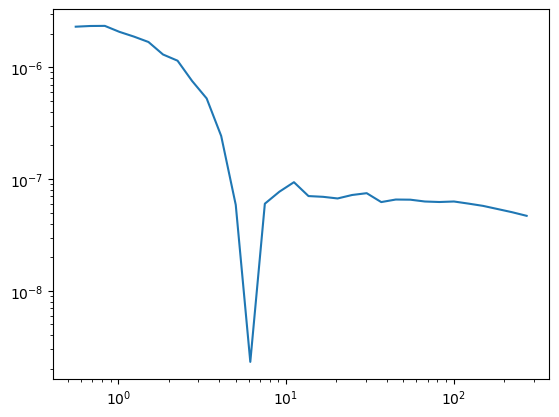

In [11]:
mplot.loglog(np.exp(corr.meanlogr), corr.xip)

In [12]:
#rho 2 
corr = treecorr.GGCorrelation(bin_size=0.2,min_sep= 0.5,max_sep= 300.0, sep_units="arcmin", bin_slop=0.1)
cat1 = treecorr.Catalog(ra=data['ra'][idx], dec=data['dec'][idx], g1=data['e1'][idx], g2=data['e2'][idx], ra_units="deg", dec_units="deg")
cat2 = treecorr.Catalog(ra=data['ra'][idx], dec=data['dec'][idx], g1=data['e1'][idx]-data['psf_e1'][idx], g2=data['e2'][idx]-data['psf_e2'][idx], ra_units="deg", dec_units="deg")
corr.process(cat1, cat2)
print(corr.meanr)
print(corr.xip)
print(corr.varxip**0.5)

[  0.55708426   0.68041535   0.83083348   1.0146554    1.23922187
   1.51344453   1.84837807   2.25736128   2.75676082   3.36680641
   4.11175357   5.02175888   6.13318604   7.49054886   9.15064187
  11.17199272  13.64514708  16.66472739  20.35419755  24.85475158
  30.358949    37.07400996  45.27312145  55.28846784  67.5206764
  82.45330965 100.69112394 122.96809003 150.15588216 183.35851392
 223.90082854 273.40606515]
[-1.17415764e-06 -1.04986022e-06 -7.76958487e-07 -9.17034049e-07
 -1.00525374e-06 -1.07153472e-06 -1.68533751e-06 -1.47430552e-06
 -1.76650820e-06 -1.76632563e-06 -1.80611614e-06 -1.71958658e-06
 -1.60924104e-06 -1.48511072e-06 -1.40062901e-06 -1.35511938e-06
 -1.25942057e-06 -1.11755315e-06 -1.01913320e-06 -9.43334544e-07
 -9.04350432e-07 -9.01056612e-07 -9.18323742e-07 -8.51105352e-07
 -7.46703938e-07 -7.31840210e-07 -7.55224468e-07 -7.41288578e-07
 -6.72551021e-07 -6.68451663e-07 -6.51080286e-07 -6.03963938e-07]
[3.03966409e-07 2.49152770e-07 2.05052342e-07 1.68429282

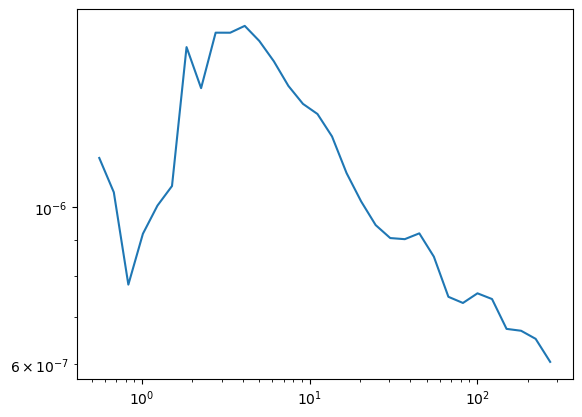

In [15]:
mplot.loglog(np.exp(corr.meanlogr), np.abs(corr.xip))